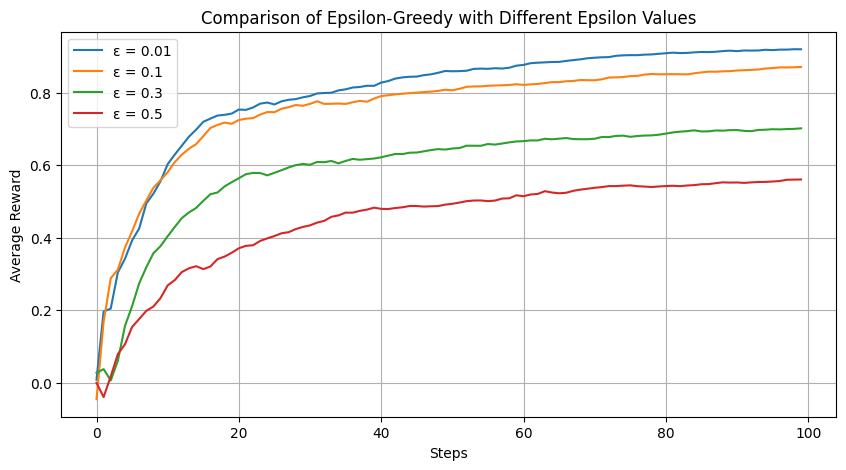

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class EpsilonGreedyAgent:
    def __init__(self, num_actions, epsilon):
        self.num_actions = num_actions
        self.epsilon = epsilon
        self.action_values = np.zeros(num_actions)
        self.action_counts = np.zeros(num_actions)

    def select_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.num_actions)
        return np.argmax(self.action_values)

    def update_value(self, action, reward):
        self.action_counts[action] += 1
        self.action_values[action] += (
            1 / self.action_counts[action]
        ) * (reward - self.action_values[action])

class MultiArmedBandit:
    def __init__(self, num_arms):
        self.true_action_values = np.random.normal(0, 1, num_arms)

    def get_reward(self, action):
        return np.random.normal(self.true_action_values[action], 1)

# Parameters
num_arms = 5
num_steps = 100
num_runs = 100
epsilons = [0.01, 0.1, 0.3, 0.5]

# Store results
results = {}

for epsilon in epsilons:
    avg_rewards = np.zeros(num_steps)

    for _ in range(num_runs):
        agent = EpsilonGreedyAgent(num_arms, epsilon)
        bandit = MultiArmedBandit(num_arms)
        total_reward = 0

        for step in range(1, num_steps + 1):
            action = agent.select_action()
            reward = bandit.get_reward(action)
            agent.update_value(action, reward)

            total_reward += reward
            avg_rewards[step - 1] += total_reward / step

    results[epsilon] = avg_rewards / num_runs

# Plot
plt.figure(figsize=(10, 5))

for epsilon, avg_rewards in results.items():
    plt.plot(avg_rewards, label=f"ε = {epsilon}")

plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.title("Comparison of Epsilon-Greedy with Different Epsilon Values")
plt.legend()
plt.grid(True)
plt.show()
